<h2 style="color:#1f77b4;">Live Coding Parte 2</h2>

<h5 style="color:#1f77b4;">1. Importar librerías necesarias (pandas, schedule, datetime)</h5>

In [2]:
#pip install schedule

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import requests
from io import StringIO
from datetime import datetime
import schedule
import time

<h5 style="color:#1f77b4;">2. Leer valor del dolar en la Web de SII</h5>

In [70]:
# Leer Web

url = "https://www.sii.cl/valores_y_fechas/dolar/dolar2026.htm"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers, timeout=30).text
tablas = pd.read_html(
    StringIO(html),
    decimal=",",     # coma = decimal
    thousands=".",   # punto = miles
)

# Ver cuántas tablas y una “vista rápida” de cada una
print("Cantidad de tablas:", len(tablas))
for i, t in enumerate(tablas):
    print(i, t.shape, "->", list(t.columns)[:6])

Cantidad de tablas: 2
0 (11, 6) -> [0, 1, 2, 3, 4, 5]
1 (32, 13) -> ['Día', 'Ene', 'Feb', 'Mar', 'Abr', 'May']


In [71]:
t = tablas[len(tablas)-1].copy()
t

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,907.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,901.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,905.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,896.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,895.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,896.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h5 style="color:#1f77b4;">3. Limpiar datos (tipos, nulos, duplicados)</h5>

<p>melt() toma valores que estaban separados en columnas y los organiza en filas, indicando de dónde viene cada uno.</p>

In [66]:
# 1) Formato largo (Day-Month-Value)
meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

df_dolar = t.melt(          # melt() reordena la tabla: una sola columna de valores
    id_vars=["Día"],        # “Día” se mantiene como identificador
    value_vars=meses,       # columnas que se van a ordenar (Ene..Dic)
    var_name="Mes",         # nombre de la nueva columna que guardará el mes
    value_name="Dolar"      # nombre de la nueva columna que guardará el valor
)
df_dolar.head()

,Día,Mes,Dolar
0,1,Ene,NaN
1,2,Ene,907.13
2,3,Ene,NaN
3,4,Ene,NaN
4,5,Ene,901.55
...,...,...,...
95,Promedio,Mar,NaN
96,1,Abr,NaN
97,2,Abr,NaN
98,3,Abr,NaN


In [67]:
# 2) Mapa mes -> número
# Ejemplo mental:
# "Ene" → map_mes["Ene"] → 1
# "Dic" → map_mes["Dic"] → 12
map_mes = {"Ene":1,"Feb":2,"Mar":3,"Abr":4,"May":5,"Jun":6,"Jul":7,"Ago":8,"Sep":9,"Oct":10,"Nov":11,"Dic":12}
df_dolar["MesNum"] = df_dolar["Mes"].map(map_mes)
df_dolar.head()

,Día,Mes,Dolar,MesNum
0,1,Ene,NaN,1
1,2,Ene,907.13,1
2,3,Ene,NaN,1
3,4,Ene,NaN,1
4,5,Ene,901.55,1
...,...,...,...,...
95,Promedio,Mar,NaN,3
96,1,Abr,NaN,4
97,2,Abr,NaN,4
98,3,Abr,NaN,4


In [68]:
# 3) Crear fecha (año fijo 2026) y limpiar nulos
df_dolar["Fecha"] = pd.to_datetime(
    {"year": 2026, "month": df_dolar["MesNum"], "day": df_dolar["Día"]},
    errors="coerce"
)
df_dolar.head()

,Día,Mes,Dolar,MesNum,Fecha
0,1,Ene,NaN,1,2026-01-01
1,2,Ene,907.13,1,2026-01-02
2,3,Ene,NaN,1,2026-01-03
3,4,Ene,NaN,1,2026-01-04
4,5,Ene,901.55,1,2026-01-05
...,...,...,...,...,...
95,Promedio,Mar,NaN,3,NaT
96,1,Abr,NaN,4,2026-04-01
97,2,Abr,NaN,4,2026-04-02
98,3,Abr,NaN,4,2026-04-03


In [69]:
# Eliminar NaN
df_dolar = df_dolar.dropna(subset=["Dolar", "Fecha"]).sort_values("Fecha").reset_index(drop=True)
df_dolar.head()

,Día,Mes,Dolar,MesNum,Fecha
0,2,Ene,907.13,1,2026-01-02
1,5,Ene,901.55,1,2026-01-05
2,6,Ene,905.14,1,2026-01-06
3,7,Ene,896.82,1,2026-01-07
4,8,Ene,895.33,1,2026-01-08
5,9,Ene,896.89,1,2026-01-09
6,12,Ene,895.54,1,2026-01-12
7,13,Ene,885.71,1,2026-01-13
8,14,Ene,883.96,1,2026-01-14
9,15,Ene,882.74,1,2026-01-15


In [62]:
df_dolar.shape

(11, 5)

<h5 style="color:#1f77b4;">4. Gráficar</h5>

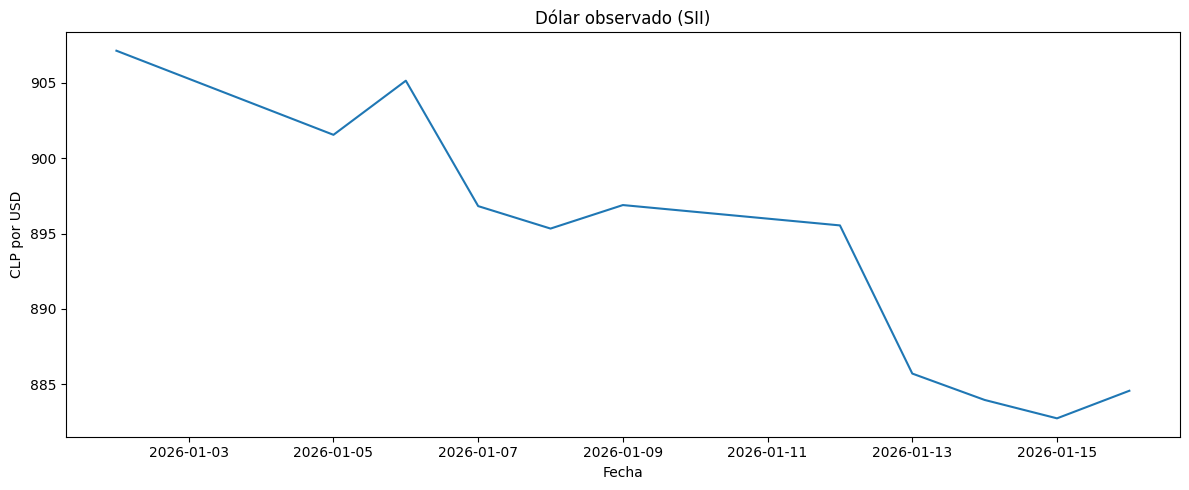

In [64]:
import matplotlib.pyplot as plt

# asegúrate de tener df_dolar con columnas: "Fecha" y "Dolar"
df_plot = df_dolar.dropna(subset=["Fecha", "Dolar"]).sort_values("Fecha")

plt.figure(figsize=(12, 5))
plt.plot(df_plot["Fecha"], df_plot["Dolar"])
plt.title("Dólar observado (SII)")
plt.xlabel("Fecha")
plt.ylabel("CLP por USD")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import requests
from io import StringIO

def leer_dolar_sii(anio: int):
    url = f"https://www.sii.cl/valores_y_fechas/dolar/dolar{anio}.htm"
    headers = {"User-Agent": "Mozilla/5.0"}

    html = requests.get(url, headers=headers, timeout=30).text

    tablas = pd.read_html(
        StringIO(html),
        decimal=",",
        thousands="."
    )

    # tabla "principal" (la más grande)
    t = max(tablas, key=lambda df: df.shape[0] * df.shape[1]).copy()

    meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

    df_dolar = t.melt(
        id_vars=["Día"],
        value_vars=meses,
        var_name="Mes",
        value_name="Dolar"
    )

    map_mes = {"Ene":1,"Feb":2,"Mar":3,"Abr":4,"May":5,"Jun":6,"Jul":7,"Ago":8,"Sep":9,"Oct":10,"Nov":11,"Dic":12}
    df_dolar["MesNum"] = df_dolar["Mes"].map(map_mes)

    df_dolar["Fecha"] = pd.to_datetime(
        {"year": anio, "month": df_dolar["MesNum"], "day": df_dolar["Día"]},
        errors="coerce"
    )

    df_dolar = df_dolar.dropna(subset=["Fecha", "Dolar"]).sort_values("Fecha").reset_index(drop=True)
    return df_dolar[["Fecha", "Dolar"]]

df_dolar_2025 = leer_dolar_sii(2025)
df_dolar_2025.head()

,Fecha,Dolar
0,2025-01-02,996.46
1,2025-01-03,999.84
2,2025-01-06,1011.82
3,2025-01-07,1010.98
4,2025-01-08,1005.85


In [74]:

df_dolar_2024 = leer_dolar_sii(2024)
df_dolar_2024.head()

,Fecha,Dolar
0,2024-01-02,877.12
1,2024-01-03,880.92
2,2024-01-04,884.39
3,2024-01-05,884.45
4,2024-01-08,893.07


In [76]:
df_dolar_2026 = leer_dolar_sii(2026)

df_dolar_vf = pd.concat([
    df_dolar_2024.assign(Anio=2024),
    df_dolar_2025.assign(Anio=2025),
    df_dolar_2026.assign(Anio=2026),
], ignore_index=True)

df_dolar_vf.head()


,Fecha,Dolar,Anio
0,2024-01-02,877.12,2024
1,2024-01-03,880.92,2024
2,2024-01-04,884.39,2024
3,2024-01-05,884.45,2024
4,2024-01-08,893.07,2024


In [77]:
df_dolar_vf["Anio"].unique()

array([2024, 2025, 2026])

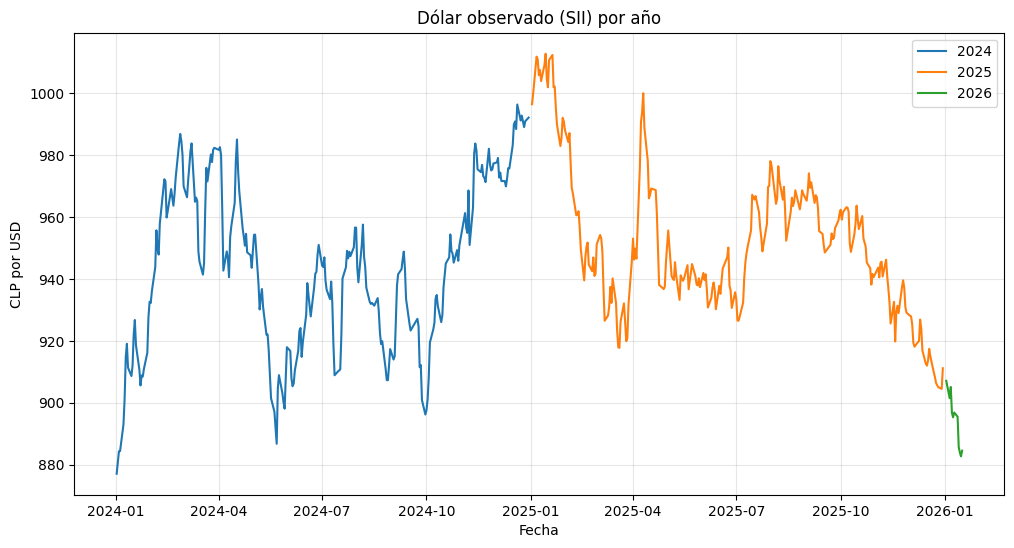

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for anio, g in df_dolar_vf.sort_values("Fecha").groupby("Anio"):
    plt.plot(g["Fecha"], g["Dolar"], label=str(anio))

plt.title("Dólar observado (SII) por año")
plt.xlabel("Fecha")
plt.ylabel("CLP por USD")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
